In [3]:
import numpy as np
import pandas
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
import sklearn.metrics as met

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data = pd.read_excel("input/GS.xlsx")
data.head()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
0,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.3,45,4,0.013037,0.000001,325003.743,0.011679,89249.0449,43350.8677
1,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.3,45,4,0.013037,0.000001,325003.743,0.011679,89249.0449,43350.8677
2,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.3,45,16,0.013037,0.000001,323881.211,0.011679,89249.0357,43350.8780
3,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.3,45,16,0.013037,0.000001,323881.211,0.011679,89249.0357,43350.8780
4,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.7,45,4,0.013031,0.000001,324521.213,0.011694,89248.6265,43351.1203


In [5]:
data.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
count,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,5.112560e+05,511256.000000,511256.000000,511256.000000,511256.000000
mean,77.219948,5.521694,5.474263,2.883633,2.596500,3.784581,1.966773,0.552608,490462.837763,2.822226,60.534803,9.639564,0.008216,6.813112e-07,434007.205237,0.009151,74146.317994,42541.339365
std,3.230443,1.689582,1.543937,1.480793,1.772752,1.320244,1.150108,0.360680,36750.492800,0.382141,12.236502,4.523169,0.004853,2.185965e-07,95250.410143,0.001110,5668.953436,945.019554
min,64.666010,2.428475,2.440739,0.800476,0.251011,1.600925,0.166228,0.041771,371768.168000,2.300000,45.000000,4.000000,0.000691,1.999793e-07,310946.421000,0.006611,60692.020100,39250.486200
25%,75.115312,3.976884,4.521433,1.285921,0.675283,2.580479,0.889508,0.303332,465258.168000,2.300000,45.000000,4.000000,0.003620,5.223182e-07,326260.612750,0.008163,70125.281725,41931.633800
50%,77.181610,5.634227,5.219382,2.864820,2.789015,3.705235,1.834664,0.682587,488638.279000,2.700000,60.000000,10.000000,0.007516,6.616520e-07,389839.030500,0.009267,73743.904700,42559.032950
75%,79.289207,6.875620,6.682164,4.244600,4.298018,4.718171,2.926325,0.893440,512782.425000,3.300000,75.000000,14.000000,0.012313,8.164642e-07,494297.100750,0.010137,77804.438400,43163.743175
max,90.431421,10.070793,10.070793,6.138764,6.087227,7.377651,4.874693,1.270933,620082.425000,3.300000,75.000000,16.000000,0.019419,1.524292e-06,575764.841000,0.011831,89588.989900,46387.057000


In [6]:
data.isnull().sum().sort_values(ascending = True)

C1 (Mass Fraction)         0
MDEA Make-up (KMole/hr)    0
Water Make-up (Mole/hr)    0
Sweetened Gas (H2S)        0
Sweetened Gas (CO2)        0
P-OUT (bar)                0
HEX_T-HOT (C)              0
Reg Molar RR               0
NG Mass Flow (Kg/hr)       0
H2S (Mass Fraction)        0
CO2 (Mass Fraction)        0
N2 (Mass Fraction)         0
NC4 (Mass Fraction)        0
IC4 (Mass Fraction)        0
C3 (Mass Fraction)         0
C2 (Mass Fraction)         0
Exergy (KW)                0
HHV (Kj/cum)               0
dtype: int64

In [7]:
data = data.dropna()

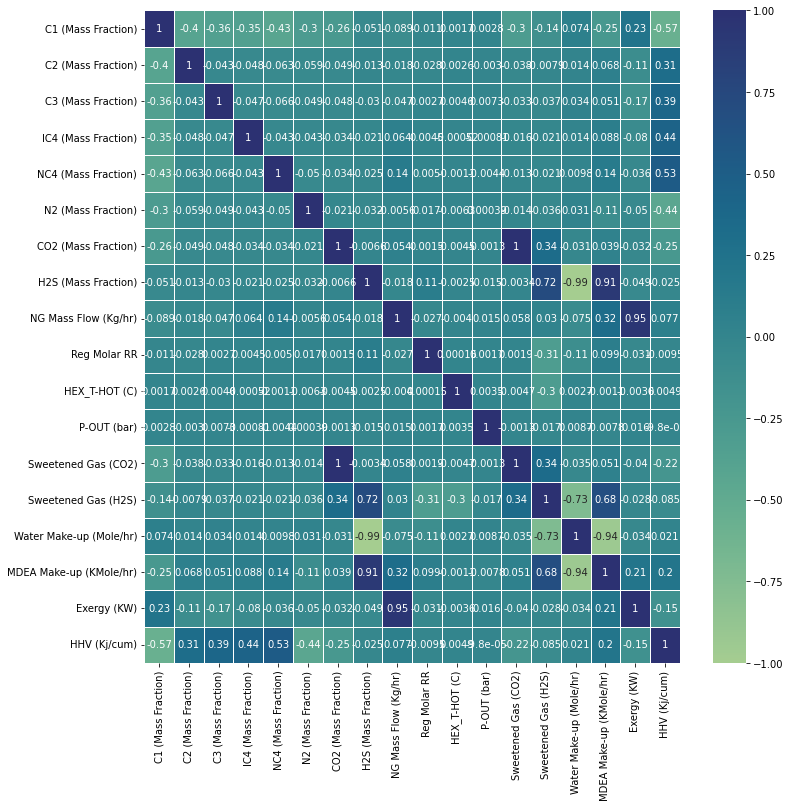

In [8]:
corr_matrix = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,vmin=-1, cmap="crest", annot=True, linewidth=.6 )
plt.show()

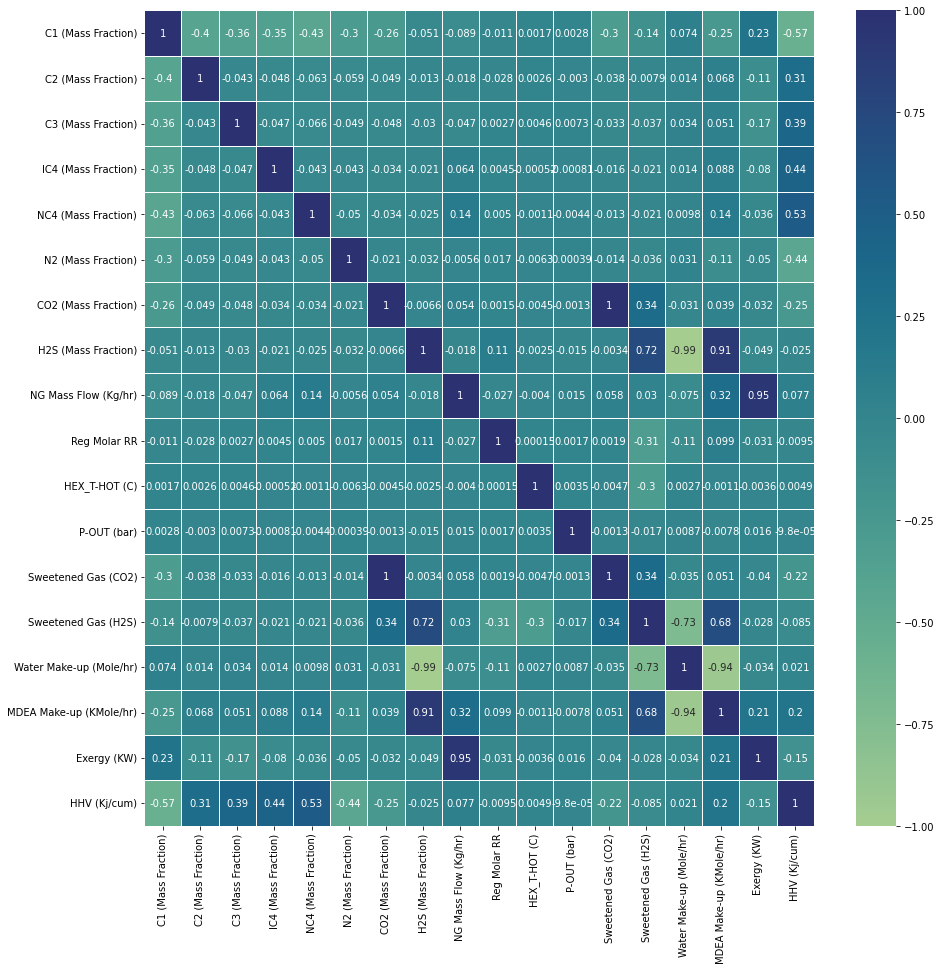

In [9]:

corr_matrix = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,vmin=-1, cmap="crest", annot=True, linewidth=.5 )
plt.show()

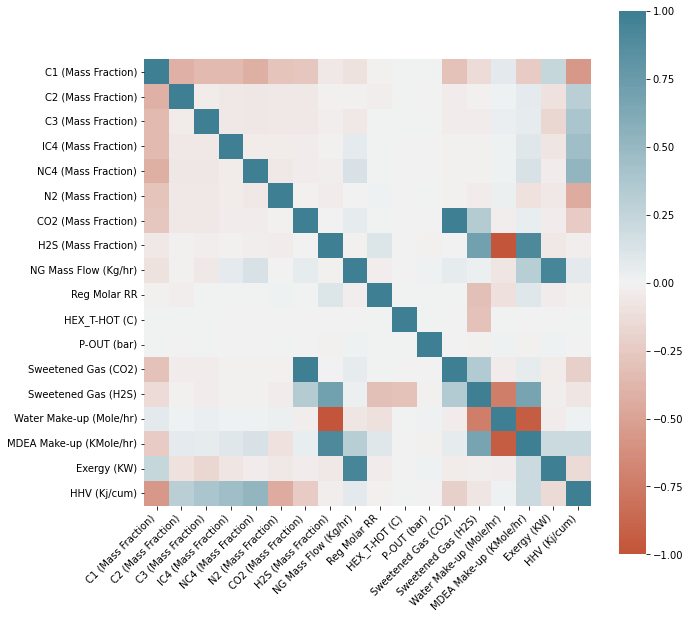

In [9]:
corr = data.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20,random_state=40)
train, valid=train_test_split(train, test_size=0.125, random_state=40)

In [ ]:
train.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
count,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,3.578780e+05,357878.000000,357878.000000,357878.000000,357878.000000
mean,77.216775,5.522655,5.474947,2.884577,2.596279,3.783693,1.968359,0.552715,490453.116917,2.822101,60.540698,9.637661,0.008223,6.814907e-07,433976.233971,0.009151,74142.753312,42541.971019
std,3.231980,1.689950,1.544384,1.481046,1.772594,1.319685,1.150340,0.360588,36762.488441,0.381866,12.236925,4.523427,0.004854,2.187411e-07,95220.323077,0.001110,5669.903453,946.057769
min,64.666010,2.428475,2.440739,0.800476,0.251011,1.600925,0.166228,0.041771,371768.168000,2.300000,45.000000,4.000000,0.000691,1.999793e-07,310946.421000,0.006611,60692.020100,39250.492300
25%,75.113299,3.977767,4.520596,1.285921,0.677680,2.578409,0.891488,0.304498,465186.881000,2.300000,45.000000,4.000000,0.003627,5.228015e-07,326246.943500,0.008164,70123.573200,41932.647550
50%,77.181610,5.633089,5.220026,2.866104,2.789015,3.705235,1.836797,0.682284,488618.168000,2.700000,60.000000,10.000000,0.007523,6.615652e-07,389846.411000,0.009267,73733.092200,42559.501950
75%,79.287534,6.876684,6.683383,4.244989,4.297976,4.713117,2.928211,0.893273,512778.168000,3.300000,75.000000,14.000000,0.012321,8.165946e-07,494209.563750,0.010137,77804.416450,43164.994075
max,90.431421,10.070793,10.070793,6.138764,6.087227,7.377651,4.874693,1.270933,620082.425000,3.300000,75.000000,16.000000,0.019419,1.524292e-06,575738.566000,0.011831,89588.989900,46387.054800


In [12]:
test.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
count,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,1.022520e+05,102252.000000,102252.000000,102252.000000,102252.000000
mean,77.219484,5.516468,5.471879,2.883207,2.601723,3.788222,1.965914,0.553102,490490.001286,2.822421,60.478494,9.645660,0.008212,6.817667e-07,433859.953181,0.009153,74150.071217,42540.288906
std,3.229039,1.689565,1.542762,1.480998,1.773693,1.322180,1.148673,0.361078,36696.480581,0.383069,12.237692,4.522015,0.004846,2.189557e-07,95374.499506,0.001111,5664.184047,943.238683
min,64.666010,2.428475,2.445655,0.801143,0.251011,1.602514,0.166228,0.041771,371768.168000,2.300000,45.000000,4.000000,0.000691,2.000421e-07,311065.211000,0.006613,60692.029100,39250.486200
25%,75.113299,3.972223,4.521433,1.285659,0.676153,2.583136,0.891488,0.302316,465382.425000,2.300000,45.000000,4.000000,0.003623,5.218428e-07,326201.411750,0.008160,70128.500825,41932.112025
50%,77.175724,5.631429,5.219125,2.867336,2.793406,3.705406,1.843964,0.684018,488686.881000,2.700000,60.000000,10.000000,0.007560,6.628565e-07,389761.276500,0.009271,73753.191700,42557.128700
75%,79.285898,6.872742,6.671899,4.244600,4.304133,4.736414,2.920067,0.894777,512782.425000,3.300000,75.000000,14.000000,0.012299,8.171973e-07,494468.913000,0.010141,77793.774850,43159.131350
max,90.431421,10.070793,10.070793,6.138764,6.080750,7.377651,4.874693,1.250986,620082.425000,3.300000,75.000000,16.000000,0.019419,1.523055e-06,575742.764000,0.011792,89588.987800,46386.954300


In [13]:
valid.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
count,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.00000,51126.000000,51126.000000,5.112600e+04,51126.000000,51126.000000,51126.000000,51126.000000
mean,77.243091,5.525417,5.474244,2.877878,2.587603,3.783511,1.957384,0.550873,490476.555876,2.822711,60.60615,9.640692,0.008175,6.791437e-07,434518.505793,0.009144,74163.764038,42539.018755
std,3.222447,1.687051,1.543177,1.478627,1.771972,1.320293,1.151325,0.360531,36775.134196,0.382211,12.23092,4.523749,0.004857,2.168496e-07,95212.865149,0.001108,5671.910517,941.312150
min,64.666010,2.447017,2.440739,0.800476,0.251011,1.600925,0.166255,0.041771,371768.168000,2.300000,45.00000,4.000000,0.000699,2.038969e-07,311385.172000,0.006611,60692.046800,39250.552700
25%,75.145315,3.977501,4.521445,1.284087,0.667944,2.580969,0.870344,0.301015,465186.881000,2.300000,45.00000,4.000000,0.003573,5.203636e-07,326470.482000,0.008160,70128.882675,41924.121500
50%,77.187964,5.650474,5.213443,2.855638,2.785465,3.703083,1.792825,0.681420,488588.279000,2.700000,60.00000,10.000000,0.007411,6.601867e-07,389950.511000,0.009258,73781.268800,42558.290050
75%,79.322303,6.871911,6.676100,4.239460,4.288376,4.714133,2.920067,0.891131,513058.168000,3.300000,75.00000,14.000000,0.012296,8.139392e-07,494714.960250,0.010126,77826.297750,43162.991100
max,90.431421,10.070793,10.070793,6.138764,6.080750,7.377651,4.869445,1.240280,620082.425000,3.300000,75.00000,16.000000,0.019387,1.523055e-06,575764.841000,0.011827,89588.494100,46387.057000


In [11]:
col_randoms = ["C1 (Mass Fraction)", "C2 (Mass Fraction)","C3 (Mass Fraction)","IC4 (Mass Fraction)","NC4 (Mass Fraction)","N2 (Mass Fraction)","CO2 (Mass Fraction)","H2S (Mass Fraction)","NG Mass Flow (Kg/hr)","Reg Molar RR","HEX_T-HOT (C)","P-OUT (bar)"]
col_target1 = ["Sweetened Gas (CO2)"]

In [12]:
train_feature = train[col_randoms ]
train_target = train[col_target1]
train_feature.shape
train_target.shape

(357878, 1)

In [13]:
val_feature = valid[col_randoms]
val_target = valid[col_target1]

In [ ]:
test_feature = test[col_randoms]
test_target = test[col_target1]

In [ ]:
train_feature.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar)
count,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000
mean,77.216775,5.522655,5.474947,2.884577,2.596279,3.783693,1.968359,0.552715,490453.116917,2.822101,60.540698,9.637661
std,3.231980,1.689950,1.544384,1.481046,1.772594,1.319685,1.150340,0.360588,36762.488441,0.381866,12.236925,4.523427
min,64.666010,2.428475,2.440739,0.800476,0.251011,1.600925,0.166228,0.041771,371768.168000,2.300000,45.000000,4.000000
25%,75.113299,3.977767,4.520596,1.285921,0.677680,2.578409,0.891488,0.304498,465186.881000,2.300000,45.000000,4.000000
50%,77.181610,5.633089,5.220026,2.866104,2.789015,3.705235,1.836797,0.682284,488618.168000,2.700000,60.000000,10.000000
75%,79.287534,6.876684,6.683383,4.244989,4.297976,4.713117,2.928211,0.893273,512778.168000,3.300000,75.000000,14.000000
max,90.431421,10.070793,10.070793,6.138764,6.087227,7.377651,4.874693,1.270933,620082.425000,3.300000,75.000000,16.000000


In [ ]:
test_target.describe()

,Sweetened Gas (CO2)
count,102252.000000
mean,0.008212
std,0.004846
min,0.000691
25%,0.003623
50%,0.007560
75%,0.012299
max,0.019419


In [15]:
sc_train = pd.DataFrame(columns=train_feature.columns)
sc_train[sc_train.columns] = sc.fit_transform(train_feature)
sc_test= pd.DataFrame(columns=test_feature.columns , index=test_feature.index)
sc_test[sc_test.columns] = sc.fit_transform(test_feature)
sc_valid=pd.DataFrame(columns=val_feature.columns, index=val_feature.index)
sc_valid[sc_valid.columns]=sc.fit_transform(val_feature)

In [16]:
sc_valid.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar)
count,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04
mean,-9.655548e-16,1.188268e-16,1.225793e-16,1.070136e-16,6.434716e-17,2.856013e-16,1.534325e-16,-3.329931e-16,-4.992117e-16,1.939796e-16,1.688592e-16,-5.336784e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-3.902998e+00,-1.824740e+00,-1.965773e+00,-1.404967e+00,-1.318652e+00,-1.653123e+00,-1.555726e+00,-1.412102e+00,-3.227984e+00,-1.367609e+00,-1.275971e+00,-1.246919e+00
25%,-6.509948e-01,-9.175364e-01,-6.174327e-01,-1.077897e+00,-1.083356e+00,-9.108233e-01,-9.441728e-01,-6.930321e-01,-6.876908e-01,-1.367609e+00,-1.275971e+00,-1.246919e+00
50%,-1.710728e-02,7.412865e-02,-1.690044e-01,-1.504118e-02,1.116631e-01,-6.091731e-02,-1.429311e-01,3.621017e-01,-5.134707e-02,-3.210574e-01,-4.955927e-02,7.942790e-02
75%,6.452340e-01,7.981425e-01,7.788271e-01,9.208510e-01,9.598290e-01,7.048670e-01,8.361602e-01,9.437794e-01,6.140517e-01,1.248770e+00,1.176853e+00,9.636589e-01
max,4.092684e+00,2.694299e+00,2.978657e+00,2.205369e+00,1.971353e+00,2.722255e+00,2.529337e+00,1.912218e+00,3.524314e+00,1.248770e+00,1.176853e+00,1.405774e+00


In [ ]:
test_target.describe()

,Sweetened Gas (CO2)
count,102252.000000
mean,0.008212
std,0.004846
min,0.000691
25%,0.003623
50%,0.007560
75%,0.012299
max,0.019419


In [ ]:
model1 = Sequential()
#model.add(Dense(33, input_dim=11, kernel_initializer= 'normal' , activation='relu'))
model1.add(Dense(22, kernel_initializer= 'normal' , activation= 'relu' ))
#model.add(Dense(33, kernel_initializer= 'normal' , activation= 'relu' ))
model1.add(Dense(11, kernel_initializer= 'normal' , activation= 'relu' ))
model1.add(Dense(1, kernel_initializer= 'normal'))
#

In [24]:
model1.compile(loss= 'mean_squared_error' , optimizer= 'adam', metrics=['accuracy'])

In [272]:
#اگر کار نکرد و چیزی نشون نداد خپمساوی را بردار
# epochs_hist= build_ann()
#epochs_hist=model.fit(sc_train, train_target, epochs=20, batch_size=500, validation_data=(sc_valid,val_target))

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [274]:

#callback = EarlyStopping(
#    monitor="val_loss",
#    min_delta=0.00001,
#    patience=20,
#    verbose=1,
#    mode="auto",
#    baseline=None,
#    restore_best_weights=False)

In [ ]:
#epochs_hist=model.fit(sc_train, train_target, epochs=100, batch_size=5, validation_data=(sc_valid,val_target), callbacks=callback)
epochs_hist=model1.fit(sc_train, train_target, epochs=50, batch_size=2, validation_data=(sc_valid,val_target))

Epoch 1/50
178939/178939 [==============================] - 210s 1ms/step - loss: 8.0585e-08 - accuracy: 0.0000e+00 - val_loss: 8.9004e-09 - val_accuracy: 0.0000e+00
Epoch 2/50
178939/178939 [==============================] - 220s 1ms/step - loss: 4.9743e-08 - accuracy: 0.0000e+00 - val_loss: 6.5063e-08 - val_accuracy: 0.0000e+00
Epoch 3/50
178939/178939 [==============================] - 241s 1ms/step - loss: 4.8806e-08 - accuracy: 0.0000e+00 - val_loss: 2.8933e-08 - val_accuracy: 0.0000e+00
Epoch 4/50
178939/178939 [==============================] - 240s 1ms/step - loss: 4.9804e-08 - accuracy: 0.0000e+00 - val_loss: 7.7783e-09 - val_accuracy: 0.0000e+00
Epoch 5/50
178939/178939 [==============================] - 245s 1ms/step - loss: 4.8973e-08 - accuracy: 0.0000e+00 - val_loss: 1.2134e-07 - val_accuracy: 0.0000e+00
Epoch 6/50
178939/178939 [==============================] - 251s 1ms/step - loss: 4.9460e-08 - accuracy: 0.0000e+00 - val_loss: 1.2604e-07 - val_accuracy: 0.0000e+00
Epoc

In [27]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
y_pred1 = model1.predict(sc_test)
print(y_pred1)

[[0.00244608]
 [0.01235716]
 [0.0093952 ]
 ...
 [0.01398176]
 [0.00331673]
 [0.01001926]]


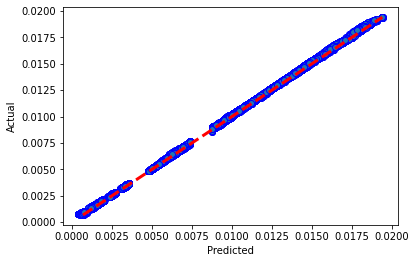

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred1, test_target, edgecolors=(0, 0, 1))
ax.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

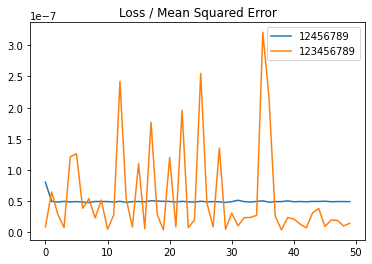

In [ ]:
import matplotlib.pyplot as pyplot

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(epochs_hist.history['loss'], label='12456789')
pyplot.plot(epochs_hist.history['val_loss'], label='123456789')
pyplot.legend()
pyplot.show()

In [31]:
#es = EarlyStopping(monitor='val_accuracy', patience=20, mode='max')
#hist = model.fit(sc_train, train_target, batch_size=500, validation_data=(sc_valid,val_target), 
#               epochs=10, verbose=1, callbacks=[es])

In [32]:
result = model1.evaluate(sc_test, test_target)


3196/3196 [==============================] - 4s 1ms/step - loss: 2.3431e-08 - accuracy: 0.0000e+00


In [33]:
results = pd.DataFrame(columns=["model", "r2", "mae", "rmse", "potential"])

In [ ]:

def get_regression_metrics(y_pred1):
    global y_test
    return (
        met.r2_score(test_target, y_pred1),
        met.mean_absolute_error(test_target, y_pred1),
        np.sqrt(met.mean_squared_error(test_target, y_pred1)))


def print_regression_metrics(y_pred1, model_name, potential):
    global results
    
    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred1)
    print("R2 =   {0:.1f}% \nMAE =  {1:.00000010f} \nRMSE = {2:.00000010f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results["model"]==model_name).any()):
        rdict = {
            "model": model_name,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential}
        results = results.append(rdict, ignore_index=True)
        
    else:
        idx = results.index[results['model'] == model_name].tolist()[0]
        results.at[idx, "r2"] = r2
        results.at[idx, "mae"] = mae
        results.at[idx, "rmse"] = rmse
        results.at[idx, "potential"] = potential

In [ ]:
y_pred1_annk = model1.predict(sc_test)

print_regression_metrics(y_pred1_annk, "epochs_hist", "Major")
#utils.plot_regression_results(test_y, y_pred_annk, "epochs_hist")

R2 =   99.9% 
MAE =  0.0001389060 
RMSE = 0.0001530714


C:\Users\mostafa\AppData\Local\Temp\ipykernel_5812\1703070223.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc)


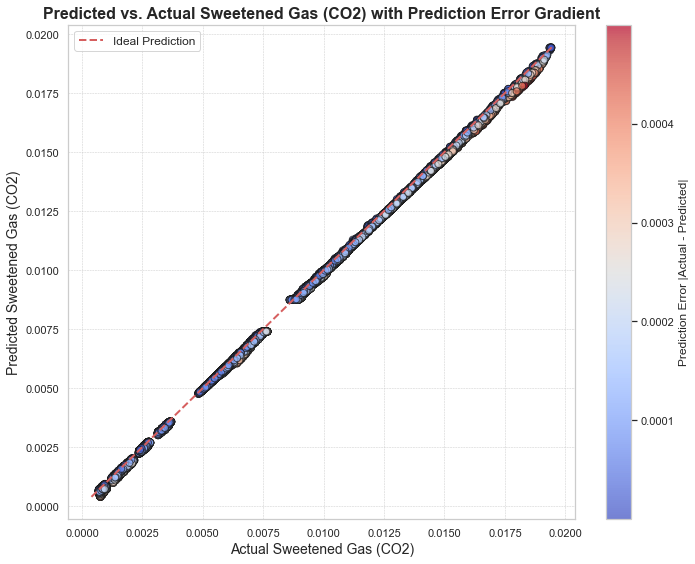

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_target is the actual target values for test set
y_test_original = np.array(test_target).flatten()  # Replace with your actual variable if different
y_pred1 = np.array(y_pred1).flatten()

# Set the style for Seaborn
sns.set(style="whitegrid", palette="muted")

# Create the plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    y_test_original, y_pred1,
    c=np.abs(y_pred1 - y_test_original),
    cmap="coolwarm", s=50, alpha=0.7, edgecolor="k"
)

# Add color bar to indicate prediction error (absolute difference)
cbar = plt.colorbar(sc)
cbar.set_label("Prediction Error |Actual - Predicted|", fontsize=12)

# Plot a 1:1 reference line
min_val = min(y_test_original.min(), y_pred1.min())
max_val = max(y_test_original.max(), y_pred1.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Ideal Prediction")

# Labels and title
plt.xlabel("Actual Sweetened Gas (CO2)", fontsize=14)
plt.ylabel("Predicted Sweetened Gas (CO2)", fontsize=14)
plt.title("Predicted vs. Actual Sweetened Gas (CO2) with Prediction Error Gradient", fontsize=16, fontweight='bold')

# Legend and grid
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

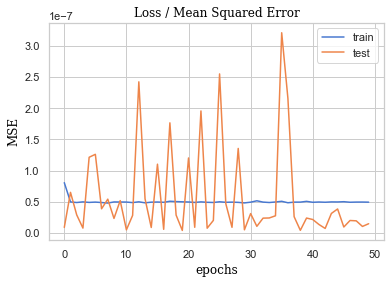

In [45]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
pyplot.title('Loss / Mean Squared Error', fontdict=font)
pyplot.plot(epochs_hist.history['loss'], label='train')
pyplot.plot(epochs_hist.history['val_loss'], label='test')

plt.xlabel('epochs', fontdict=font)
plt.ylabel('MSE', fontdict=font)

pyplot.legend()
pyplot.show()

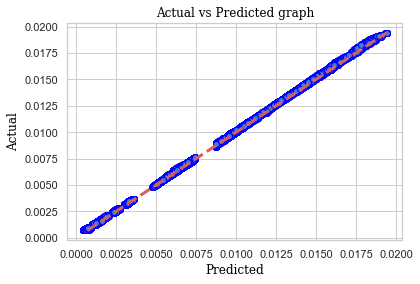

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred1, test_target, edgecolors=(0, 0, 1))
ax.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--', lw=3)
ax.set_xlabel('Predicted', fontdict=font)
ax.set_ylabel('Actual', fontdict=font)
plt.title('Actual vs Predicted graph', fontdict=font)

plt.show()

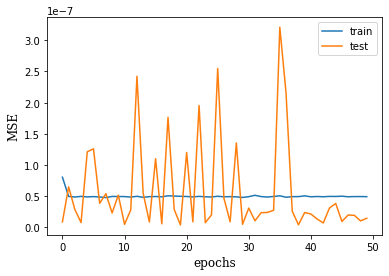

In [43]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
pyplot.plot(epochs_hist.history['loss'], label='train')
pyplot.plot(epochs_hist.history['val_loss'], label='test')

plt.xlabel('epochs', fontdict=font)
plt.ylabel('MSE', fontdict=font)

pyplot.legend()
pyplot.show()

In [288]:
# به منظور ذخیره ی مدل از لینک زیر استفاده کن

In [289]:
#https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb#scrollTo=Fp5gbuiaPqCT

In [17]:
col_targets2 = ["Sweetened Gas (H2S)"]
col_targets3 = ["Water Make-up (Mole/hr)"]
col_targets4 = ["MDEA Make-up (KMole/hr)"]
col_targets5 = ["Exergy (KW)"]
col_targets6 = ["HHV (Kj/cum)"]


In [18]:
train_target2 = train[col_targets2]
train_target2.shape
val_target2 = valid[col_targets2]
test_target2 = test[col_targets2]
test_target2.describe()

train_target3 = train[col_targets3]
train_target3.shape
val_target3 = valid[col_targets3]
test_target3 = test[col_targets3]
test_target3.describe()

train_target4 = train[col_targets4]
train_target4.shape
val_target4 = valid[col_targets4]
test_target4 = test[col_targets4]
test_target4.describe()

train_target5 = train[col_targets5]
train_target5.shape
val_target5 = valid[col_targets5]
test_target5 = test[col_targets5]
test_target5.describe()

train_target6 = train[col_targets6]
train_target6.shape
val_target6 = valid[col_targets6]
test_target6 = test[col_targets6]
test_target6.describe()

,HHV (Kj/cum)
count,102252.000000
mean,42540.288906
std,943.238683
min,39250.486200
25%,41932.112025
50%,42557.128700
75%,43159.131350
max,46386.954300


In [19]:
model2 = Sequential()
#model2.add(Dense(33, input_dim=11, kernel_initializer= 'normal' , activation='relu'))
#model.add(Dense(33, kernel_initializer= 'normal' , activation= 'relu' ))
model2.add(Dense(22, kernel_initializer= 'normal' , activation= 'relu' ))
model2.add(Dense(11, kernel_initializer= 'normal' , activation= 'relu' ))
model2.add(Dense(1, kernel_initializer= 'normal'))

In [20]:
model2.compile(loss= 'mean_squared_error' , optimizer= 'adam', metrics=['accuracy'])

In [21]:
epochs_hist2=model2.fit(sc_train, train_target2, epochs=50, batch_size=2, validation_data=(sc_valid,val_target2))

Epoch 1/50
178939/178939 [==============================] - 238s 1ms/step - loss: 3.4832e-09 - accuracy: 0.0000e+00 - val_loss: 4.3839e-12 - val_accuracy: 0.0000e+00
Epoch 2/50
178939/178939 [==============================] - 279s 2ms/step - loss: 7.0563e-10 - accuracy: 0.0000e+00 - val_loss: 3.0821e-11 - val_accuracy: 0.0000e+00
Epoch 3/50
178939/178939 [==============================] - 218s 1ms/step - loss: 7.0461e-10 - accuracy: 0.0000e+00 - val_loss: 1.7648e-09 - val_accuracy: 0.0000e+00
Epoch 4/50
178939/178939 [==============================] - 202s 1ms/step - loss: 7.0467e-10 - accuracy: 0.0000e+00 - val_loss: 4.0257e-11 - val_accuracy: 0.0000e+00
Epoch 5/50
178939/178939 [==============================] - 206s 1ms/step - loss: 7.0564e-10 - accuracy: 0.0000e+00 - val_loss: 3.4595e-11 - val_accuracy: 0.0000e+00
Epoch 6/50
178939/178939 [==============================] - 205s 1ms/step - loss: 7.0492e-10 - accuracy: 0.0000e+00 - val_loss: 4.7421e-10 - val_accuracy: 0.0000e+00
Epoc

In [29]:
y_pred2 = model2.predict(sc_test)
print(y_pred2)
import matplotlib.pyplot as pyplot

[[1.4205154e-05]
 [1.4205154e-05]
 [1.4205154e-05]
 ...
 [1.4205154e-05]
 [1.4205154e-05]
 [1.4205154e-05]]


In [41]:
result2 = model2.evaluate(sc_test, test_target2)
results2 = pd.DataFrame(columns=["model", "r2", "mae", "rmse", "potential"])

3196/3196 [==============================] - 6s 2ms/step - loss: 1.8293e-10 - accuracy: 0.0000e+00


In [44]:
def print_regression_metrics(y_pred2, model_name, potential):
    global results2  # Add this line

    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred2)
    print("R2 =   {0:.1f}% \nMAE =  {1:.10f} \nRMSE = {2:.10f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results2["model"] == model_name).any()):
        rdict = {
            "model": model_name,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential}
        results2 = results2.append(rdict, ignore_index=True)
    else:
        idx = results2.index[results2['model'] == model_name].tolist()[0]
        results2.at[idx, "r2"] = r2
        results2.at[idx, "mae"] = mae
        results2.at[idx, "rmse"] = rmse
        results2.at[idx, "potential"] = potential

In [45]:
y_pred2_annk = model2.predict(sc_test)

print_regression_metrics(y_pred2_annk, "epochs_hist", "Major")

R2 =   -381472.4% 
MAE =  0.0000135234 
RMSE = 0.0000135252


C:\Users\mostafa\AppData\Local\Temp\ipykernel_17008\4070977958.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results2 = results2.append(rdict, ignore_index=True)


C:\Users\mostafa\AppData\Local\Temp\ipykernel_17008\1240159941.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc)
C:\Users\mostafa\AppData\Local\Temp\ipykernel_17008\1240159941.py:39: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\mostafa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


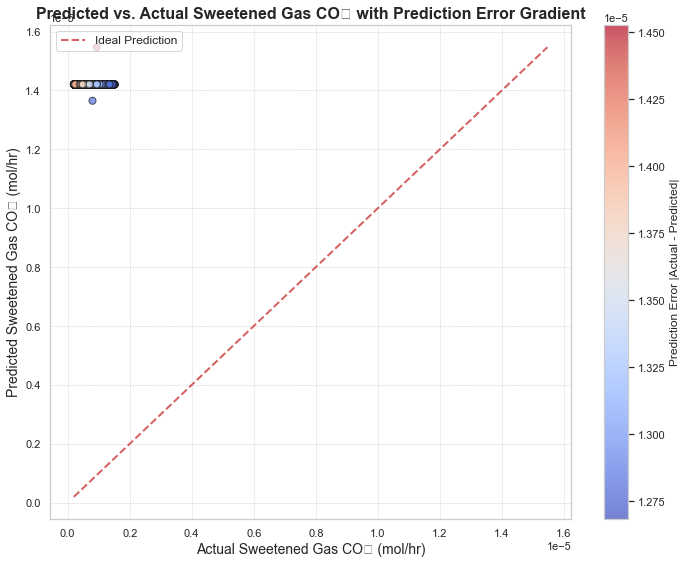

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten actual and predicted values
y_test_original = np.array(test_target2).flatten()  # Actual values
y_pred2 = np.array(y_pred2).flatten()               # Predicted values

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    y_test_original, y_pred2,
    c=np.abs(y_pred2 - y_test_original),
    cmap="coolwarm", s=50, alpha=0.7, edgecolors="k"
)

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label("Prediction Error |Actual - Predicted|", fontsize=12)

# Plot ideal 1:1 reference line
min_val = min(y_test_original.min(), y_pred2.min())
max_val = max(y_test_original.max(), y_pred2.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Ideal Prediction")

# Labels and title
plt.xlabel("Actual Sweetened Gas CO₂ (mol/hr)", fontsize=14)
plt.ylabel("Predicted Sweetened Gas CO₂ (mol/hr)", fontsize=14)
plt.title("Predicted vs. Actual Sweetened Gas CO₂ with Prediction Error Gradient", fontsize=16, fontweight='bold')

# Legend and grid
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()



In [48]:
model3 = Sequential()
#model2.add(Dense(33, input_dim=11, kernel_initializer= 'normal' , activation='relu'))
#model.add(Dense(33, kernel_initializer= 'normal' , activation= 'relu' ))
model3.add(Dense(22, kernel_initializer= 'normal' , activation= 'relu' ))
model3.add(Dense(11, kernel_initializer= 'normal' , activation= 'relu' ))
model3.add(Dense(1, kernel_initializer= 'normal'))

model3.compile(loss= 'mean_squared_error' , optimizer= 'adam', metrics=['accuracy'])

epochs_hist3=model3.fit(sc_train, train_target3, epochs=50, batch_size=2, validation_data=(sc_valid,val_target3))

Epoch 1/50
178939/178939 [==============================] - 19723s 110ms/step - loss: 6883718656.0000 - accuracy: 0.0000e+00 - val_loss: 51544308.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
178939/178939 [==============================] - 191s 1ms/step - loss: 51657592.0000 - accuracy: 0.0000e+00 - val_loss: 53719564.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
178939/178939 [==============================] - 191s 1ms/step - loss: 48511744.0000 - accuracy: 0.0000e+00 - val_loss: 29858878.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
178939/178939 [==============================] - 197s 1ms/step - loss: 18676224.0000 - accuracy: 0.0000e+00 - val_loss: 16269625.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
178939/178939 [==============================] - 201s 1ms/step - loss: 16323850.0000 - accuracy: 0.0000e+00 - val_loss: 16330552.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
178939/178939 [==============================] - 203s 1ms/step - loss: 16318505.0000 - accuracy: 0.0000e+00 - val_loss: 160

In [49]:
y_pred3 = model3.predict(sc_test)
print(y_pred3)
import matplotlib.pyplot as pyplot

[[486572.03]
 [323590.72]
 [395473.06]
 ...
 [487160.84]
 [486306.22]
 [566256.5 ]]


In [50]:
result3 = model3.evaluate(sc_test, test_target3)
results3 = pd.DataFrame(columns=["model", "r2", "mae", "rmse", "potential"])

3196/3196 [==============================] - 5s 1ms/step - loss: 16013534.0000 - accuracy: 0.0000e+00


In [51]:
def print_regression_metrics(y_pred3, model_name, potential):
    global results3  # Add this line

    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred3)
    print("R2 =   {0:.1f}% \nMAE =  {1:.10f} \nRMSE = {2:.10f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results3["model"] == model_name).any()):
        rdict = {
            "model": model_name,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential}
        results3 = results3.append(rdict, ignore_index=True)
    else:
        idx = results3.index[results3['model'] == model_name].tolist()[0]
        results3.at[idx, "r2"] = r2
        results3.at[idx, "mae"] = mae
        results3.at[idx, "rmse"] = rmse
        results3.at[idx, "potential"] = potential

In [52]:
y_pred3_annk = model3.predict(sc_test)

print_regression_metrics(y_pred3_annk, "epochs_hist", "Major")

R2 =   -411057776063301618363269120.0% 
MAE =  433630.1513994742 
RMSE = 443920.9197155581


C:\Users\mostafa\AppData\Local\Temp\ipykernel_17008\2988448440.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results3 = results3.append(rdict, ignore_index=True)


C:\Users\mostafa\AppData\Local\Temp\ipykernel_17008\3786324988.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc)
C:\Users\mostafa\AppData\Local\Temp\ipykernel_17008\3786324988.py:39: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\mostafa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


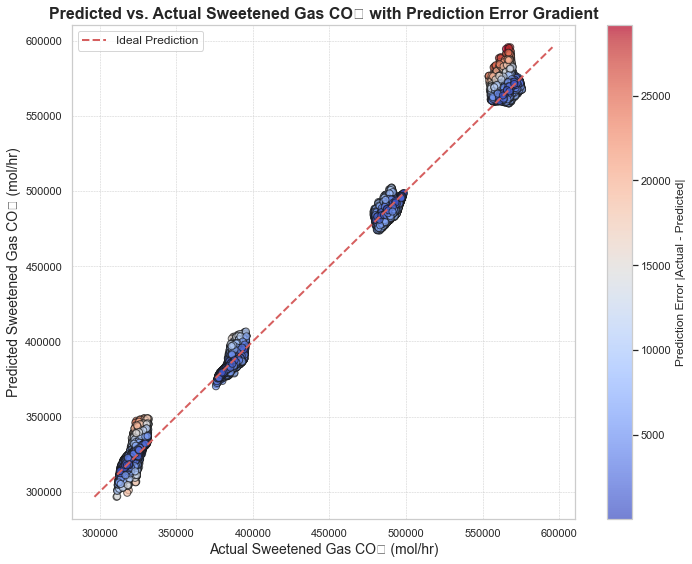

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten actual and predicted values
y_test_original = np.array(test_target3).flatten()  # Actual values
y_pred3 = np.array(y_pred3).flatten()               # Predicted values

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    y_test_original, y_pred3,
    c=np.abs(y_pred3 - y_test_original),
    cmap="coolwarm", s=50, alpha=0.7, edgecolors="k"
)

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label("Prediction Error |Actual - Predicted|", fontsize=12)

# Plot ideal 1:1 reference line
min_val = min(y_test_original.min(), y_pred3.min())
max_val = max(y_test_original.max(), y_pred3.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Ideal Prediction")

# Labels and title
plt.xlabel("Actual Sweetened Gas CO₂ (mol/hr)", fontsize=14)
plt.ylabel("Predicted Sweetened Gas CO₂ (mol/hr)", fontsize=14)
plt.title("Predicted vs. Actual Sweetened Gas CO₂ with Prediction Error Gradient", fontsize=16, fontweight='bold')

# Legend and grid
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()



In [58]:
model4 = Sequential()
#model2.add(Dense(33, input_dim=11, kernel_initializer= 'normal' , activation='relu'))
#model.add(Dense(33, kernel_initializer= 'normal' , activation= 'relu' ))
model4.add(Dense(22, kernel_initializer= 'normal' , activation= 'relu' ))
model4.add(Dense(11, kernel_initializer= 'normal' , activation= 'relu' ))
model4.add(Dense(1, kernel_initializer= 'normal'))

model4.compile(loss= 'mean_squared_error' , optimizer= 'adam', metrics=['accuracy'])
epochs_hist4=model4.fit(sc_train, train_target4, epochs=50, batch_size=2, validation_data=(sc_valid,val_target4))

Epoch 1/50
178939/178939 [==============================] - 210s 1ms/step - loss: 1.9611e-08 - accuracy: 0.0000e+00 - val_loss: 9.1975e-09 - val_accuracy: 0.0000e+00
Epoch 2/50
178939/178939 [==============================] - 224s 1ms/step - loss: 1.1439e-08 - accuracy: 0.0000e+00 - val_loss: 1.0401e-09 - val_accuracy: 0.0000e+00
Epoch 3/50
178939/178939 [==============================] - 262s 1ms/step - loss: 1.0911e-08 - accuracy: 0.0000e+00 - val_loss: 1.8953e-09 - val_accuracy: 0.0000e+00
Epoch 4/50
178939/178939 [==============================] - 288s 2ms/step - loss: 1.1041e-08 - accuracy: 0.0000e+00 - val_loss: 3.5115e-09 - val_accuracy: 0.0000e+00
Epoch 5/50
178939/178939 [==============================] - 319s 2ms/step - loss: 1.0986e-08 - accuracy: 0.0000e+00 - val_loss: 8.4803e-09 - val_accuracy: 0.0000e+00
Epoch 6/50
178939/178939 [==============================] - 309s 2ms/step - loss: 1.0853e-08 - accuracy: 0.0000e+00 - val_loss: 3.8253e-09 - val_accuracy: 0.0000e+00
Epoc

In [6]:
model5 = Sequential()
#model2.add(Dense(33, input_dim=11, kernel_initializer= 'normal' , activation='relu'))
#model.add(Dense(33, kernel_initializer= 'normal' , activation= 'relu' ))
model5.add(Dense(22, kernel_initializer= 'normal' , activation= 'relu' ))
model5.add(Dense(11, kernel_initializer= 'normal' , activation= 'relu' ))
model5.add(Dense(1, kernel_initializer= 'normal'))

model5.compile(loss= 'mean_squared_error' , optimizer= 'adam', metrics=['accuracy'])
epochs_hist5=model5.fit(sc_train, train_target5, epochs=50, batch_size=2, validation_data=(sc_valid,val_target5))

NameError: name 'sc_train' is not defined

In [5]:
model6 = Sequential()
#model2.add(Dense(33, input_dim=11, kernel_initializer= 'normal' , activation='relu'))
#model.add(Dense(33, kernel_initializer= 'normal' , activation= 'relu' ))
model6.add(Dense(22, kernel_initializer= 'normal' , activation= 'relu' ))
model6.add(Dense(11, kernel_initializer= 'normal' , activation= 'relu' ))
model6.add(Dense(1, kernel_initializer= 'normal'))

model6.compile(loss= 'mean_squared_error' , optimizer= 'adam', metrics=['accuracy'])
epochs_hist6=model6.fit(sc_train, train_target6, epochs=50, batch_size=2, validation_data=(sc_valid,val_target6))

NameError: name 'sc_train' is not defined

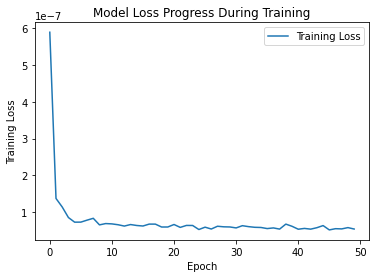

In [299]:
plt.plot(epochs_hist2.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

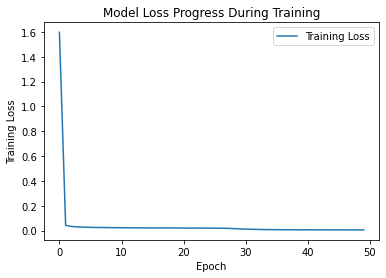

In [300]:
plt.plot(epochs_hist3.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

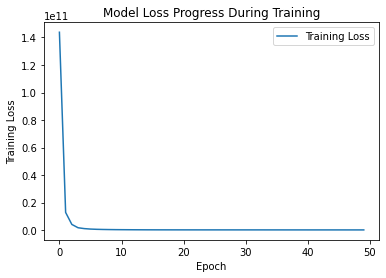

In [301]:
plt.plot(epochs_hist4.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

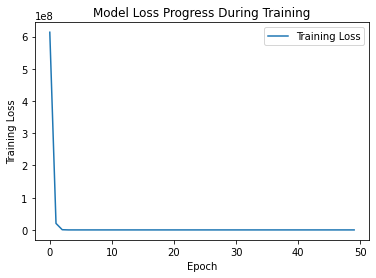

In [302]:
plt.plot(epochs_hist5.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

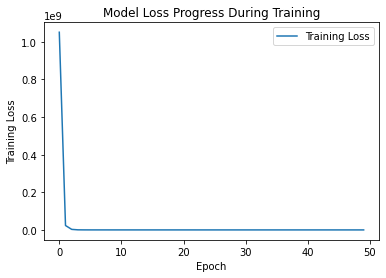

In [303]:
plt.plot(epochs_hist6.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [304]:
#result = model2.evaluate(sc_test, test_target2)

In [305]:
def get_regression_metrics(y_pred2):
    global y_test2
    return (
        met.r2_score(test_target2, y_pred2),
        met.mean_absolute_error(test_target2, y_pred2),
        np.sqrt(met.mean_squared_error(test_target2, y_pred2)))


def print_regression_metrics(y_pred2, model_name2, potential2):
    global results
    
    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred2)
    print("R2 =   {0:.1f}% \nMAE =  {1:.2f} \nRMSE = {2:.2f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results["model"]==model_name2).any()):
        rdict = {
            "model": model_name2,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential2}
        results = results.append(rdict, ignore_index=True)
        
    else:
        idx = results.index[results['model'] == model_name2].tolist()[0]
        results.at[idx, "r2"] = r2
        results.at[idx, "mae"] = mae
        results.at[idx, "rmse"] = rmse
        results.at[idx, "potential"] = potential2

In [306]:
def get_regression_metrics(y_pred3):
    global y_test3
    return (
        met.r2_score(test_target3, y_pred3),
        met.mean_absolute_error(test_target3, y_pred3),
        np.sqrt(met.mean_squared_error(test_target3, y_pred3)))


def print_regression_metrics(y_pred3, model_name3, potential3):
    global results
    
    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred3)
    print("R2 =   {0:.1f}% \nMAE =  {1:.2f} \nRMSE = {2:.2f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results["model"]==model_name3).any()):
        rdict = {
            "model": model_name3,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential3}
        results = results.append(rdict, ignore_index=True)
        
    else:
        idx = results.index[results['model'] == model_name3].tolist()[0]
        results.at[idx, "r2"] = r2
        results.at[idx, "mae"] = mae
        results.at[idx, "rmse"] = rmse
        results.at[idx, "potential"] = potential3

In [307]:
def get_regression_metrics(y_pred4):
    global y_test4
    return (
        met.r2_score(test_target4, y_pred4),
        met.mean_absolute_error(test_target4, y_pred4),
        np.sqrt(met.mean_squared_error(test_target4, y_pred4)))


def print_regression_metrics(y_pred4, model_name4, potential4):
    global results
    
    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred4)
    print("R2 =   {0:.1f}% \nMAE =  {1:.2f} \nRMSE = {2:.2f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results["model"]==model_name4).any()):
        rdict = {
            "model": model_name4,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential4}
        results = results.append(rdict, ignore_index=True)
        
    else:
        idx = results.index[results['model'] == model_name4].tolist()[0]
        results.at[idx, "r2"] = r2
        results.at[idx, "mae"] = mae
        results.at[idx, "rmse"] = rmse
        results.at[idx, "potential"] = potential4

In [308]:
def get_regression_metrics(y_pred5):
    global y_test5
    return (
        met.r2_score(test_target5, y_pred5),
        met.mean_absolute_error(test_target5, y_pred5),
        np.sqrt(met.mean_squared_error(test_target5, y_pred5)))


def print_regression_metrics(y_pred5, model_name5, potential5):
    global results
    
    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred5)
    print("R2 =   {0:.1f}% \nMAE =  {1:.2f} \nRMSE = {2:.2f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results["model"]==model_name5).any()):
        rdict = {
            "model": model_name5,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential5}
        results = results.append(rdict, ignore_index=True)
        
    else:
        idx = results.index[results['model'] == model_name5].tolist()[0]
        results.at[idx, "r2"] = r2
        results.at[idx, "mae"] = mae
        results.at[idx, "rmse"] = rmse
        results.at[idx, "potential"] = potential5

In [309]:
def get_regression_metrics(y_pred6):
    global y_test6
    return (
        met.r2_score(test_target6, y_pred6),
        met.mean_absolute_error(test_target6, y_pred6),
        np.sqrt(met.mean_squared_error(test_target6, y_pred6)))


def print_regression_metrics(y_pred6, model_name6, potential6):
    global results
    
    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred6)
    print("R2 =   {0:.1f}% \nMAE =  {1:.2f} \nRMSE = {2:.2f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results["model"]==model_name6).any()):
        rdict = {
            "model": model_name6,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential6}
        results = results.append(rdict, ignore_index=True)
        
    else:
        idx = results.index[results['model'] == model_name6].tolist()[0]
        results.at[idx, "r2"] = r2
        results.at[idx, "mae"] = mae
        results.at[idx, "rmse"] = rmse
        results.at[idx, "potential"] = potential6

In [310]:
y_pred_annk2 = model2.predict(sc_test)

print_regression_metrics(y_pred_annk2, "epochs_hist2", "Major")

R2 =   -741.4% 
MAE =  47679.09 
RMSE = 50792.73


C:\Users\mostafa\AppData\Local\Temp\ipykernel_18424\2419785906.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rdict, ignore_index=True)


In [311]:
y_pred_annk3 = model3.predict(sc_test)

print_regression_metrics(y_pred_annk3, "epochs_hist3", "Major")

R2 =   -741.2% 
MAE =  47670.83 
RMSE = 50784.65


C:\Users\mostafa\AppData\Local\Temp\ipykernel_18424\2419785906.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rdict, ignore_index=True)
